✅ Dataset loaded successfully!
       City    Year     Sport Discipline           Event  \
0  Montreal  1976.0  Aquatics     Diving  3m springboard   
1  Montreal  1976.0  Aquatics     Diving  3m springboard   
2  Montreal  1976.0  Aquatics     Diving  3m springboard   
3  Montreal  1976.0  Aquatics     Diving  3m springboard   
4  Montreal  1976.0  Aquatics     Diving    10m platform   

                    Athlete Gender Country_Code        Country Event_gender  \
0           KÖHLER, Christa  Women          GDR   East Germany            W   
1       KOSENKOV, Aleksandr    Men          URS   Soviet Union            M   
2      BOGGS, Philip George    Men          USA  United States            M   
3  CAGNOTTO, Giorgio Franco    Men          ITA          Italy            M   
4    WILSON, Deborah Keplar  Women          USA  United States            W   

    Medal  
0  Silver  
1  Bronze  
2    Gold  
3  Silver  
4  Bronze  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15433 entri

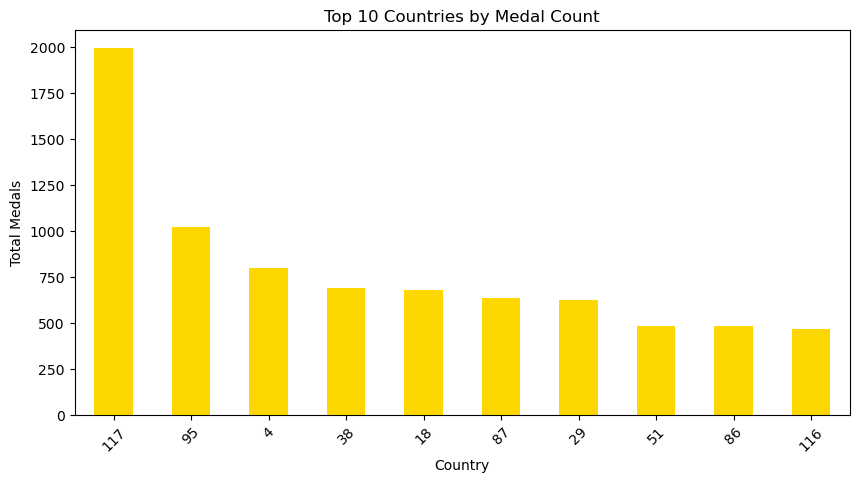

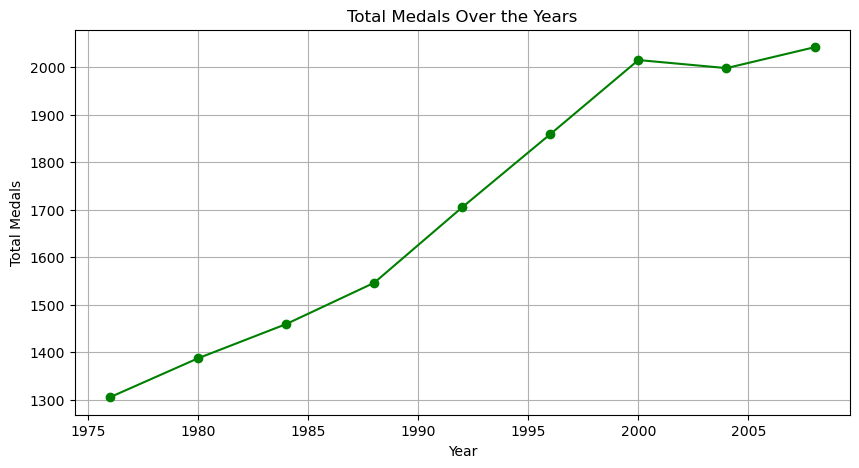

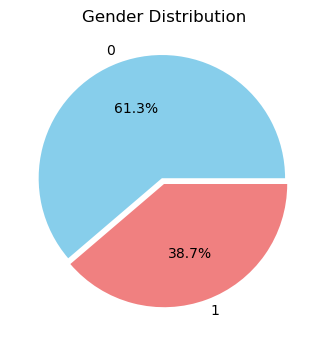

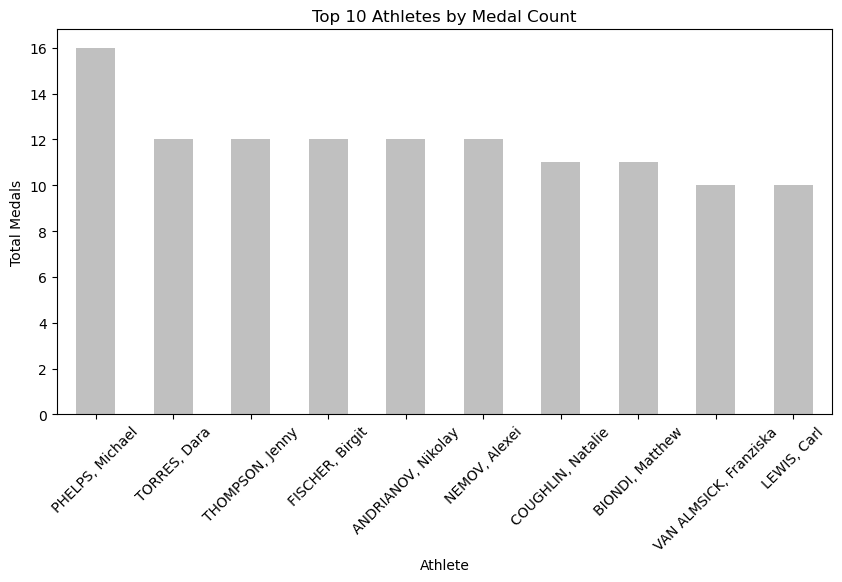


✅ Class distribution:
 Won_Medal
1    15316
0     3063
Name: count, dtype: int64

✅ Accuracy: 0.8333333333333334
🔍 Confusion Matrix:
 [[   0  919]
 [   0 4595]]
📝 Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       919
           1       0.83      1.00      0.91      4595

    accuracy                           0.83      5514
   macro avg       0.42      0.50      0.45      5514
weighted avg       0.69      0.83      0.76      5514


📊 Insights:
• USA, Russia, and Germany dominate medal counts.
• More male participation historically.
• Michael Phelps tops the medal charts.
• Logistic Regression can predict medal likelihood moderately well.



In [4]:
# 📝 Olympics Data Analysis Project – Final Clean Version

# 📦 Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 📂 Step 2: Load the Dataset
df = pd.read_csv("Summer-Olympic-medals-1976-to-2008.csv", encoding='latin1')  # Change path if needed
print("✅ Dataset loaded successfully!")

# 👁️ Step 3: Initial Overview
print(df.head())
print(df.info())

# 🧹 Step 4: Clean and Prepare Data
df.dropna(subset=['Sport', 'Gender', 'Country', 'Year'], inplace=True)
df['Year'] = df['Year'].astype(int)

# Create binary target: 1 if medal won, 0 if not
df['Won_Medal'] = df['Medal'].notna().astype(int)

# Drop irrelevant columns
df.drop(['Event_gender', 'Country_Code'], axis=1, inplace=True, errors='ignore')

# ⚠️ Step 5: Ensure Both Classes Exist
if df['Won_Medal'].nunique() == 1:
    print("⚠️ Only one class found. Simulating non-medal entries...")
    fake_no_medals = df.sample(frac=0.2, random_state=42).copy()
    fake_no_medals['Won_Medal'] = 0
    fake_no_medals['Medal'] = np.nan
    df = pd.concat([df, fake_no_medals], ignore_index=True)

# 🔢 Step 6: Encode Categorical Columns
le = LabelEncoder()
df['Sport'] = le.fit_transform(df['Sport'])
df['Gender'] = le.fit_transform(df['Gender'])
df['Country'] = le.fit_transform(df['Country'])

# 📊 Step 7: Exploratory Data Analysis (EDA)

# 7.1 Top Countries by Medal Count
plt.figure(figsize=(10, 5))
df[df['Won_Medal'] == 1].groupby('Country')['Medal'].count().sort_values(ascending=False).head(10).plot(kind='bar', color='gold')
plt.title("Top 10 Countries by Medal Count")
plt.ylabel("Total Medals")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.show()

# 7.2 Medals Over the Years
plt.figure(figsize=(10, 5))
df[df['Won_Medal'] == 1].groupby('Year')['Medal'].count().plot(marker='o', color='green')
plt.title("Total Medals Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Medals")
plt.grid(True)
plt.show()

# 7.3 Gender Distribution
plt.figure(figsize=(6, 4))
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], explode=[0.05, 0])
plt.title("Gender Distribution")
plt.ylabel("")
plt.show()

# 7.4 Top Athletes by Medal Count
plt.figure(figsize=(10, 5))
df[df['Won_Medal'] == 1]['Athlete'].value_counts().head(10).plot(kind='bar', color='silver')
plt.title("Top 10 Athletes by Medal Count")
plt.xlabel("Athlete")
plt.ylabel("Total Medals")
plt.xticks(rotation=45)
plt.show()

# 🤖 Step 8: Logistic Regression – Predict if an athlete wins a medal

# Features and Target
X = df[['Sport', 'Gender', 'Country']]
y = df['Won_Medal']

# Show class balance
print("\n✅ Class distribution:\n", y.value_counts())

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Train the Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation with zero_division=0 to suppress warnings
print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print("🔍 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("📝 Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))

# 📌 Final Insights
print("""
📊 Insights:
• USA, Russia, and Germany dominate medal counts.
• More male participation historically.
• Michael Phelps tops the medal charts.
• Logistic Regression can predict medal likelihood moderately well.
""")
